<a href="https://colab.research.google.com/github/ndtuan10/DeepLearning_CS431.L21.KHCL/blob/main/BaiTap/BaiTap1_CNN_Handwritten/BaiTap1_CNN_handwritten_LeNet%2BMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **BÀI TẬP 1**

**Môn : Các kỹ thuật học sâu và ứng dụng - CS431.L21.KHCL**
 
***Yêu cầu:*** Cài đặt mạng CNN dựa trên code mẫu với thiết kế cho mạng CNN là:

- n = 2, k = 3

- Số lớp fully connected: 2

- Output: 10 neuron tương ứng 10 chữ số viết (từ 0 đến 9)

- Activation function: ReLU

In [ ]:
from google.colab import drive
drive.mount('/content/drive') 

Mounted at /content/drive


In [ ]:
# Thư viện được sử dụng
import tensorflow as tf
from tensorflow import keras
from keras.layers import Input, Conv2D, Dense, MaxPooling2D, Flatten
from sklearn import metrics
from sklearn.metrics import accuracy_score
from keras import Model
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
print('''
  Phiên bản của các thư viện :
    + Tensorflow : {0}
    + keras : {1}
    + numpy : {2}
    + matplotlib : {3}
    + pandas : {4}
'''.format(tf.__version__, keras.__version__, np.__version__, matplotlib.__version__, pd.__version__))



  Phiên bản của các thư viện :
    + Tensorflow : 2.4.1
    + keras : 2.4.0
    + numpy : 1.19.5
    + matplotlib : 3.2.2
    + pandas : 1.1.5



#**1.Giới thiệu về Dataset MNIST**
 Dataset sử dụng về phân loại chữ số viết tay (Handwritten digit classification) từ **MNIST**, chứa khoảng 60.000 ảnh được dùng để train và 10.000 ảnh được dùng để test phân thành 10 loại (tương ứng nhãn từ chữ 0 đến 9).  Độ phân giải thấp (28 by 28 pixels = 784 pixels), như hình minh hoạ bên dưới:


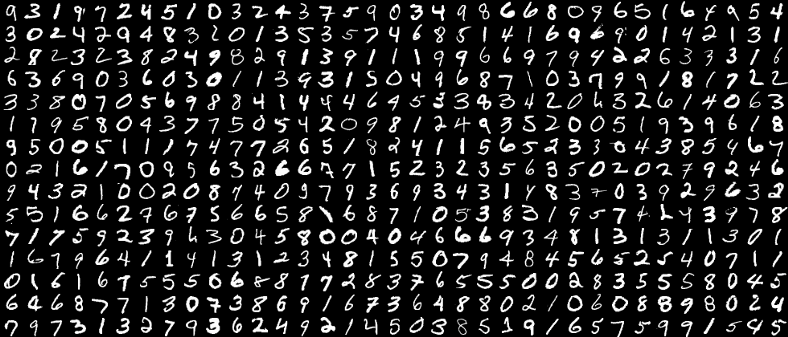




Ta sẽ load dataset trực tiếp từ chính thư viện [keras](https://keras.io/api/datasets/mnist/) đã được tích hợp sẵn.

#**2.Thiết lập mô hình mạng CNN**

In [ ]:
class LeNet:
  # khởi tạo 1 số tham số chính của mô hình  
  def __init__(self):
    self.model = None

  # Xây dựng kiến trúc cho mạng
  def build(self, input_dim):
    input = Input(shape=input_dim)

    # Tầng 2D Convolution + Tầng activation (ReLU) + Tầng Pooling
    C1 = Conv2D(6, (3, 3), padding="same", activation='relu', use_bias=True)(input)
    C2 = Conv2D(6, (3, 3), padding="same", activation='relu', use_bias=True)(input)
    C3 = Conv2D(6, (3, 3), padding="same", activation='relu', use_bias=True)(input)
    S1 = MaxPooling2D(pool_size=(2, 2), strides=2, padding="same")(C3) #sử dụng thủ tục max-pooling
    C4 = Conv2D(16, (5, 5), padding="same", activation='relu', use_bias=True)(S1)
    C5 = Conv2D(16, (5, 5), padding="same", activation='relu', use_bias=True)(S1)
    C6 = Conv2D(16, (5, 5), padding="same", activation='relu', use_bias=True)(S1)
    S2 = MaxPooling2D(pool_size=(2, 2), strides=2, padding="same")(C6) #sử dụng thủ tục max-pooling

    # Tầng Fully Connected
    flat = Flatten()(S2)
    FC5 = Dense(120, activation='relu', use_bias=True)(flat)
    FC6 = Dense(84, activation='relu', use_bias=True)(FC5)
    output = Dense(10, activation='softmax', use_bias=True)(FC6) #10 neuron tượng trưng 10 giá trị output, hàm activation ở output là softmax

    # Biên dịch mô hình (*ghi chú bên dưới*)
    self.model = Model(input, output)
    self.model.compile(optimizer="sgd", loss='categorical_crossentropy', metrics=['accuracy'])
  
  # Phương thức để đưa dữ liệu vào và huấn luyện
  def train(self, x_train, y_train):
    history = self.model.fit(x_train, y_train, batch_size=128, epochs=30, validation_split=0.2)
    return history

  # dự đoán mô hình
  def predict(self, x_test):
    return self.model.predict(x_test)

  # giúp debug và in ra kiến trúc của mô hình  
  def summary(self):
    self.model.summary()

  # load mô hình từ file
  def load(self, model_file):
    self.model = load_model(model_file)

  # lưu mô hình xuống file
  def save(self, model_file):
    self.model.save(model_file)

###2.1 Biên dịch mô hình

Trước khi mô hình có thể được huấn luyện, chúng ta cần thêm các hàm toán học giúp cho việc đánh giá hay làm mô hình đi " đúng hướng ". Các chỉnh sửa này được thêm vào trong bước *biên dịch* của mô hình:

* *Hàm mất mát* — dùng để tính toán "độ sai sót" của mô hình trong quá trình huấn luyện và dự đoán. Chúng ta cần phải làm cho nghiệm của hàm này nhỏ nhất để kiểm soát mô hình đi đúng hướng. (mất mát càng ít, chính xác càng cao). *Hàm mất mát* hay *loss function* được sử dụng là `crossentropy`.
* *Hàm tối ưu* — Đây là "công cụ" để làm hàm mất mát có nghiệm nhỏ nhất, qua việc cập nhật và chỉnh sửa các tham số có trong hàm mất mát. *Hàm tối ưu* hay *optimizier function* được sử dụng là `Stochastic Gradient Descent (SGD)`.
* *Thang đo* — dùng để đo đạc độ chính xác qua mỗi quá trình huấn luyện và kiểm tra. Chúng ta sẽ sử dụng phép đo `accuracy`, nhằm nắm được tỉ lệ ảnh được phân loại chính xác.

#**3. Khai phá dữ liệu**

In [ ]:
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


Sau khi tải, dữ liệu được trả về với kiểu dữ liệu numpy.ndarray (mảng n chiều) được gán cho 4 biến : 

*x_train* , *y_train* , *x_test* , *y_test*.

In [ ]:
type(x_train)

numpy.ndarray

In [ ]:
# Khai phá dữ liệu 
print("In kích thước của tập train: ",x_train.shape)
print("Số lượng nhãn tương ứng của tập train: ", len(y_train))
print("In kích thước của tập test: ",x_test.shape)
print("Số lượng nhãn tương ứng của tập train: ", len(y_test))
result = {
    'Data':["x_train", "y_train", "x_test", "y_test"],
    'Shape': [x_train.shape, y_train.shape, x_test.shape, y_test.shape]
}
pd.DataFrame(result)

In kích thước của tập train:  (60000, 28, 28)
Số lượng nhãn tương ứng của tập train:  60000
In kích thước của tập test:  (10000, 28, 28)
Số lượng nhãn tương ứng của tập train:  10000


,Data,Shape
0,x_train,"(60000, 28, 28)"
1,y_train,"(60000,)"
2,x_test,"(10000, 28, 28)"
3,y_test,"(10000,)"


#**4. Tiền xử lý dữ liệu**

Dữ liệu cần được xử lý trước khi được dùng để huấn luyện mạng CNN. Mỗi ảnh là một mảng NumPy 2 chiều, 28x28, với mỗi pixel có giá trị từ 0 đến 255. Phân tích ảnh đầu tiên trong tập dữ liệu, chúng ta sẽ thấy các pixel có giá trị từ 0 đến 255:

5


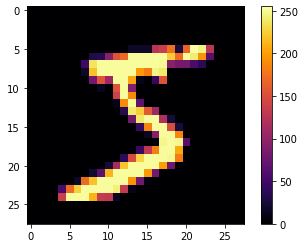

In [ ]:
plt.figure()
print(y_train[0])
plt.imshow(x_train[0], cmap="inferno")
plt.colorbar()
plt.show()

 Ta cần xử lý để mỗi một điểm ảnh có giá trị nằm trong khoảng từ 0 đến 1 (tức trong khoảng là 0% đến 100%). Để làm điều này, chúng ta chỉ cần lấy giá trị của pixel chia cho 255.

In [ ]:
# Chuẩn hóa dữ liệu
x_train_norm = x_train / 255.0 
x_test_norm = x_test / 255.0 

# Chuyển đổi sang vector one hot vector
def onehot(y):
  oh = np.zeros((y.shape[0], 10))
  oh[np.arange(y.shape[0]), y] = 1
  return oh

y_train_oh = onehot(y_train)
y_test_oh = onehot(y_test)

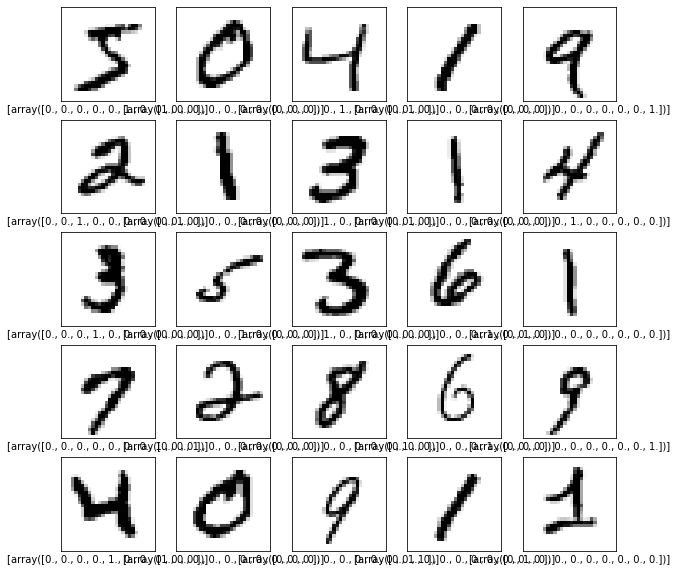

In [ ]:
# in ra 25 đầu tiên trong tập train sau khi chuẩn hóa
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel([y_train_oh[i]])
plt.show()

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Size of input:  (60000, 28, 28)


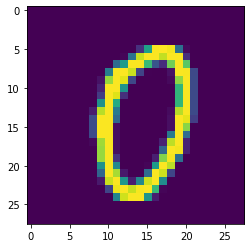

In [ ]:
index = 1000
print(y_train_oh[index])
plt.imshow(x_train[index])
print('Size of input: ', x_train.shape)

#**5.Train mô hình**

In [ ]:
leNet = LeNet()
leNet.build((28,28,1))
leNet.summary()
hist = leNet.train(x_train_norm, y_train_oh)

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 6)         60        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 14, 16)        2416      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 120)               94200 

Trong quá trình huấn luyện, các số liệu mất mát và chính xác được liệt kê trong từng quá trình lặp (epoch). Ở đây, ta lấy số epochs = 20 vì lặp càng cao, kết quả càng chính xác. Sau khi quan sát tới lần lặp cuối cùng, ta thấy độ chính xác là khá cao dao động ở mức 98%.

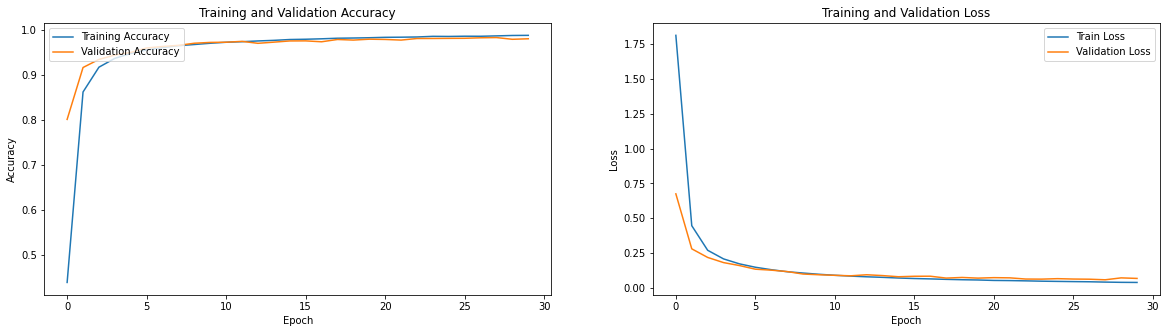

In [ ]:
plt.figure(figsize = (20,5))

plt.subplot(1,2,1)
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='upper left')


plt.subplot(1,2,2)
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Training and Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train Loss', 'Validation Loss'], loc='upper right')
plt.show()


Overfitting xảy ra khi một mô hình máy học hoạt động cực kì chính xác trên dữ liệu huấn luyện nhưng lại rất kém khi được cung cấp các dữ liệu vào mới, tức dữ liệu mà mô hình chưa từng "thấy" trước đây.

Qua 2 biểu đồ trên, ta nhận thấy sự khác biệt trong tỷ lệ chính xác và mất 
mát giữa 2 tập dữ liệu là không quá cao. Do vậy, hiện tượng quá khớp ( Overfitting) không xảy ra.

#**6.Đánh giá mô hình**

In [ ]:
pred = leNet.predict(x_test_norm)
pred = np.argmax(pred, axis = 1)

y_test_oh = np.argmax(y_test_oh, axis = 1)
print(f'Do chinh xac (Accuracy) cho tap test: {np.multiply(metrics.accuracy_score(y_test_oh, pred),100)} %')

Do chinh xac (Accuracy) cho tap test: 98.17 %


Predicted label:  0


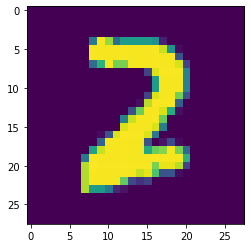

In [ ]:
index = 2101
print('Predicted label: ', np.argmax(pred[index]))
plt.imshow(x_test_norm[index])